In [2]:
%run imports.ipynb

In [3]:
import dadi
from matplotlib import pyplot as plt
import matplotlib

In [3]:
callset = callset_biallel
accessibility_fn = accessibility
contigs = ('3R')

In [4]:
allele_counts = zarr.open('data/phase2_biallel_allele_count.zarr/')
list(allele_counts['3L'].keys())

['AOcol',
 'BFcol',
 'BFgam',
 'CIcol',
 'CMgam',
 'FRgam',
 'GAgam',
 'GHcol',
 'GHgam',
 'GM',
 'GNcol',
 'GNgam',
 'GQgam',
 'GW',
 'KE',
 'UGgam']

In [6]:
outgroup_alleles = h5py.File('data/outgroup_alleles_phase2.h5')
annotation = zarr.open('data/ag1000g.phase2.ar1.pass.biallelic_snpeff/')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  """Entry point for launching an IPython kernel.


In [48]:
def consensus_aa(chrom, outgroups):
    aa = None
    for species in outgroups:
        if aa is None:
            aa = outgroup_alleles[chrom][species][:]
        else:
            loc_consensus = aa == outgroup_alleles[chrom][species][:]
            aa[~loc_consensus] = b'.'
    return aa

In [46]:
outgroups =[ 'chri', 'meru', 'mela']

In [54]:
consensus_aa('3R', ['chri'])

array([b'A', b'A', b'C', ..., b'.', b'.', b'.'], dtype='|S1')

In [8]:
pos = allel.SortedIndex(callset_biallel['3R']["variants/POS"])

In [9]:
def get_neutral(chrom, pos):
    if chrom == '3R':
        cond = (pos > 1000000) & (pos < 37000000)
    return cond

In [11]:
cond_neut = get_neutral('3R', pos)
cond_neut

array([False, False, False, ..., False, False, False])

In [12]:
ann = annotation['3R']['variants/ANN_Annotation'][:]

In [13]:
cond_inter = ann == 'intergenic_region'
cond_inter

array([False, False, False, ...,  True,  True,  True])

------------------------------

In [16]:
pops = ['AOcol',
         'BFcol',
         'BFgam',
         'CIcol',
         'CMgam',
         'FRgam',
         'GAgam',
         'GHcol',
         'GHgam',
         'GM',
         'GNcol',
         'GNgam',
         'GQgam',
         'GW',
         'KE',
         'UGgam']

In [23]:
genotypes = allel.GenotypeChunkedArray(callset_biallel['3R']["calldata/GT"])
genotypes

<GenotypeChunkedArray shape=(10752701, 1142, 2) dtype=int8 chunks=(524288, 61, 2)
   nbytes=22.9G cbytes=-1 cratio=-24559169084.0
   compression=blosc compression_opts={'cname': 'zstd', 'clevel': 1, 'shuffle': -1, 'blocksize': 0}
   values=zarr.core.Array>

In [26]:
sample_selection = metadata.population.isin(pops).values

In [27]:
samples_subset = metadata[sample_selection]
samples_subset.reset_index(drop=True, inplace=True)

In [28]:
samples_subset.population.value_counts()

CMgam    297
UGgam    112
BFgam     92
GW        91
AOcol     78
BFcol     75
CIcol     71
GAgam     69
GM        65
GHcol     55
KE        48
GNgam     40
FRgam     24
GHgam     12
GQgam      9
GNcol      4
Name: population, dtype: int64

In [32]:
subpops = {
    'all': list(range(len(samples_subset))),
    'CMgam': samples_subset[samples_subset.population == 'CMgam'].index.tolist(),
    'UGgam': samples_subset[samples_subset.population == 'UGgam'].index.tolist(),
    'BFgam': samples_subset[samples_subset.population == 'BFgam'].index.tolist(),
    'GW': samples_subset[samples_subset.population == 'GW'].index.tolist(),
    'AOcol': samples_subset[samples_subset.population == 'AOcol'].index.tolist(),
    'BFcol': samples_subset[samples_subset.population == 'BFcol'].index.tolist(),
    'CIcol': samples_subset[samples_subset.population == 'CIcol'].index.tolist(),
    'GAgam': samples_subset[samples_subset.population == 'GAgam'].index.tolist(),
    'GM': samples_subset[samples_subset.population == 'GM'].index.tolist(),
    'GHcol': samples_subset[samples_subset.population == 'GHcol'].index.tolist(),
    'KE': samples_subset[samples_subset.population == 'KE'].index.tolist(),
    'GNgam': samples_subset[samples_subset.population == 'GNgam'].index.tolist(),
    'FRgam': samples_subset[samples_subset.population == 'FRgam'].index.tolist(),
    'GHgam': samples_subset[samples_subset.population == 'GHgam'].index.tolist(),
    'GQgam': samples_subset[samples_subset.population == 'GQgam'].index.tolist(),
    'GNcol': samples_subset[samples_subset.population == 'GNcol'].index.tolist()
}

In [33]:
allele_counts = genotypes.count_alleles_subpops(subpops, max_allele=3)
allele_counts

<AlleleCountsChunkedTable shape=(10752701,) dtype=[('AOcol', '<i4', (4,)), ('BFcol', '<i4', (4,)), ('BFgam', '<i4', (4,)), ('CIcol', '<i4', (4,)), ('CMgam', '<i4', (4,)), ('FRgam', '<i4', (4,)), ('GAgam', '<i4', (4,)), ('GHcol', '<i4', (4,)), ('GHgam', '<i4', (4,)), ('GM', '<i4', (4,)), ('GNcol', '<i4', (4,)), ('GNgam', '<i4', (4,)), ('GQgam', '<i4', (4,)), ('GW', '<i4', (4,)), ('KE', '<i4', (4,)), ('UGgam', '<i4', (4,)), ('all', '<i4', (4,))]
   nbytes=2.7G cbytes=215.7M cratio=12.9
   values=allel.chunked.storage_zarr.ZarrTable>

In [103]:
ac = {}
for pop in subpops:
        ac[pop] = allel.AlleleCountsChunkedArray(allele_counts[pop][:])

In [106]:
def get_dac(chrom, ac, pop, cond_neut, outgroups):
    
    # call ancestral allele for intergenic variants in eucrom regions
    aa = consensus_aa(chrom, outgroups)[cond_neut & cond_inter]
    #assert ac[pop][cond_neut].shape[0] == aa.shape[0]
    #aa = np.compress(cond_inter, aa)
    
    # extract variants
    variants = callset[chrom]['variants']
    ref = variants['REF'][:][cond_neut & cond_inter]
    alt = variants['ALT'][:][cond_neut & cond_inter]
    
    
    # take just the ac for intergenic variants in eucrom regions
    ac_all = ac['all'][cond_neut & cond_inter]
    
    
    ac = ac[pop][cond_neut & cond_inter]
    
    
    print ("ac:",ac.shape)
   

    # locate biallelic in all pop
    loc_bi_seg = (ac_all.allelism() == 2) #& (ac[:, 0] > 0) & (ac[:, 1] > 0)
#     log(nnz(loc_bi_seg))
    print ("biallelic:", loc_bi_seg.sum())

    # locate positions where aa is determined and matches Ag1000G
    loc_aa_match = (aa != b'.') & ((aa == ref) | (aa == alt))
#     log(nnz(loc_aa_match))
    
    print ("aa_match:", loc_aa_match.sum())
#    # locate positions with missing calls
#    an = ac.sum(axis=1)
#    loc_nomiss = an == an.max()
#     log(nnz(loc_nomiss))

    # locations to use
    loc_asc = loc_bi_seg & loc_aa_match 
#     log(nnz(loc_asc), chrom, *outgroups)
    ac = ac[loc_asc]
    aa = aa[loc_asc]
    ref = ref[loc_asc]
    alt = alt[loc_asc]
    
    print ("ac:",ac.shape)

    # polarise
    dac = np.zeros(ac.shape[0], dtype='u4')
    dac[aa == ref] = ac[:, 1][aa == ref]
    dac[aa == alt] = ac[:, 0][aa == alt]
    
    print ("dac:", dac.shape)

    return dac

In [107]:
dac = {}
for pop in pops:
    dac[pop] = get_dac('3R', ac, pop, cond_neut, ['chri'])

ac: (3651719, 4)
biallelic: 3651426
aa_match: 2417938
ac: (2417734, 4)
dac: (2417734,)
ac: (3651719, 4)
biallelic: 3651426
aa_match: 2417938
ac: (2417734, 4)
dac: (2417734,)
ac: (3651719, 4)
biallelic: 3651426
aa_match: 2417938
ac: (2417734, 4)
dac: (2417734,)
ac: (3651719, 4)
biallelic: 3651426
aa_match: 2417938
ac: (2417734, 4)
dac: (2417734,)
ac: (3651719, 4)
biallelic: 3651426
aa_match: 2417938
ac: (2417734, 4)
dac: (2417734,)
ac: (3651719, 4)
biallelic: 3651426
aa_match: 2417938
ac: (2417734, 4)
dac: (2417734,)
ac: (3651719, 4)
biallelic: 3651426
aa_match: 2417938
ac: (2417734, 4)
dac: (2417734,)
ac: (3651719, 4)
biallelic: 3651426
aa_match: 2417938
ac: (2417734, 4)
dac: (2417734,)
ac: (3651719, 4)
biallelic: 3651426
aa_match: 2417938
ac: (2417734, 4)
dac: (2417734,)
ac: (3651719, 4)
biallelic: 3651426
aa_match: 2417938
ac: (2417734, 4)
dac: (2417734,)
ac: (3651719, 4)
biallelic: 3651426
aa_match: 2417938
ac: (2417734, 4)
dac: (2417734,)
ac: (3651719, 4)
biallelic: 3651426
aa_matc

In [110]:
for pop in pops:
    print (pop)
    print (dac[pop].shape)

AOcol
(2417734,)
BFcol
(2417734,)
BFgam
(2417734,)
CIcol
(2417734,)
CMgam
(2417734,)
FRgam
(2417734,)
GAgam
(2417734,)
GHcol
(2417734,)
GHgam
(2417734,)
GM
(2417734,)
GNcol
(2417734,)
GNgam
(2417734,)
GQgam
(2417734,)
GW
(2417734,)
KE
(2417734,)
UGgam
(2417734,)


In [111]:
def joint_site_frequency_spectrum(ac1, ac2, dac1, dac2):
    
    an = ac1.sum(axis=1)
    loc_nomiss = an == an.max()
    ac1 = ac1[loc_nomiss]
    

    an = ac2.sum(axis=1)
    loc_nomiss = an == an.max()
    ac2 = ac2[loc_nomiss]
    
    n = np.sum(ac1[0]) + 1
    m = np.sum(ac2[0]) + 1
    
    a = dac1
    b = dac2

    c = np.bincount(a * m + b)
    c.resize((n, m))

    return c 

In [112]:
from itertools import combinations

In [113]:
dac_dict = {pop: dac[pop] for pop in pops}

In [114]:
l = []
for i in combinations(dac_dict, 2):
    l.append("_".join(i))

In [115]:
" ".join(l)

'AOcol_BFcol AOcol_BFgam AOcol_CIcol AOcol_CMgam AOcol_FRgam AOcol_GAgam AOcol_GHcol AOcol_GHgam AOcol_GM AOcol_GNcol AOcol_GNgam AOcol_GQgam AOcol_GW AOcol_KE AOcol_UGgam BFcol_BFgam BFcol_CIcol BFcol_CMgam BFcol_FRgam BFcol_GAgam BFcol_GHcol BFcol_GHgam BFcol_GM BFcol_GNcol BFcol_GNgam BFcol_GQgam BFcol_GW BFcol_KE BFcol_UGgam BFgam_CIcol BFgam_CMgam BFgam_FRgam BFgam_GAgam BFgam_GHcol BFgam_GHgam BFgam_GM BFgam_GNcol BFgam_GNgam BFgam_GQgam BFgam_GW BFgam_KE BFgam_UGgam CIcol_CMgam CIcol_FRgam CIcol_GAgam CIcol_GHcol CIcol_GHgam CIcol_GM CIcol_GNcol CIcol_GNgam CIcol_GQgam CIcol_GW CIcol_KE CIcol_UGgam CMgam_FRgam CMgam_GAgam CMgam_GHcol CMgam_GHgam CMgam_GM CMgam_GNcol CMgam_GNgam CMgam_GQgam CMgam_GW CMgam_KE CMgam_UGgam FRgam_GAgam FRgam_GHcol FRgam_GHgam FRgam_GM FRgam_GNcol FRgam_GNgam FRgam_GQgam FRgam_GW FRgam_KE FRgam_UGgam GAgam_GHcol GAgam_GHgam GAgam_GM GAgam_GNcol GAgam_GNgam GAgam_GQgam GAgam_GW GAgam_KE GAgam_UGgam GHcol_GHgam GHcol_GM GHcol_GNcol GHcol_GNgam GHcol_GQg

In [117]:
print (i[0])
print (i[1])
ac[i[0]]

KE
UGgam


<AlleleCountsChunkedArray shape=(10752701, 4) dtype=int32
   nbytes=164.1M
   values=numpy.ndarray>

In [118]:
joint_sfs = {}
for i in combinations(dac_dict, 2):
    joint_sfs[i] = joint_site_frequency_spectrum(ac[i[0]], 
                                                ac[i[1]], 
                                                dac[i[0]], 
                                                dac[i[1]])

    

In [120]:
sfs = {}
for k in joint_sfs.keys():
    sfs[k] =  joint_sfs[k]
    mask = np.zeros_like(sfs[k], dtype=bool)
    mask[0,0] = True
    mask[-1,-1] = True
    sfs[k] =  np.ma.array(sfs[k], mask=mask)

In [125]:
sfs.keys()

dict_keys([('AOcol', 'BFcol'), ('AOcol', 'BFgam'), ('AOcol', 'CIcol'), ('AOcol', 'CMgam'), ('AOcol', 'FRgam'), ('AOcol', 'GAgam'), ('AOcol', 'GHcol'), ('AOcol', 'GHgam'), ('AOcol', 'GM'), ('AOcol', 'GNcol'), ('AOcol', 'GNgam'), ('AOcol', 'GQgam'), ('AOcol', 'GW'), ('AOcol', 'KE'), ('AOcol', 'UGgam'), ('BFcol', 'BFgam'), ('BFcol', 'CIcol'), ('BFcol', 'CMgam'), ('BFcol', 'FRgam'), ('BFcol', 'GAgam'), ('BFcol', 'GHcol'), ('BFcol', 'GHgam'), ('BFcol', 'GM'), ('BFcol', 'GNcol'), ('BFcol', 'GNgam'), ('BFcol', 'GQgam'), ('BFcol', 'GW'), ('BFcol', 'KE'), ('BFcol', 'UGgam'), ('BFgam', 'CIcol'), ('BFgam', 'CMgam'), ('BFgam', 'FRgam'), ('BFgam', 'GAgam'), ('BFgam', 'GHcol'), ('BFgam', 'GHgam'), ('BFgam', 'GM'), ('BFgam', 'GNcol'), ('BFgam', 'GNgam'), ('BFgam', 'GQgam'), ('BFgam', 'GW'), ('BFgam', 'KE'), ('BFgam', 'UGgam'), ('CIcol', 'CMgam'), ('CIcol', 'FRgam'), ('CIcol', 'GAgam'), ('CIcol', 'GHcol'), ('CIcol', 'GHgam'), ('CIcol', 'GM'), ('CIcol', 'GNcol'), ('CIcol', 'GNgam'), ('CIcol', 'GQgam'),

In [164]:
def plot_2D_sfs(sfs, pops, equal=True, min_equal_size=True, vmin=None, vmax=None):
    if vmin == None:
        vmin = sfs.min() + 1
    if vmax == None:
        vmax = sfs.max()
    # make it symmetric
    if equal == True:
        sfs = dadi.Spectrum(sfs, pop_ids = [pops[0], pops[1]])
        proj = min(sfs.sample_sizes[0], sfs.sample_sizes[1])
        
        #if min_equal_size == True:
           # proj = 8
       # sfs = sfs.project([proj,proj])
    fig, ax = plt.subplots()
        
    norm = matplotlib.colors.LogNorm(vmin=vmin*(1-1e-3), vmax=vmax*(1+1e-3)) 
    format = matplotlib.ticker.LogFormatterMathtext() 
    mappable=ax.pcolormesh(np.ma.masked_where(sfs<vmin, sfs),  
                            cmap=plt.cm.hsv, shading='flat', 
                            norm=norm) 
    ax.figure.colorbar(mappable, extend='neither', format=format) 
    ax.plot([0, sfs.shape[1]],[0, sfs.shape[0]], '-k', lw=0.2) 
    ax.autoscale(tight=True)
    ax.set_xlabel(pops[1])
    ax.set_ylabel(pops[0])

In [165]:
%matplotlib inline

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


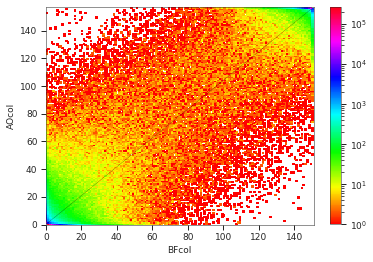

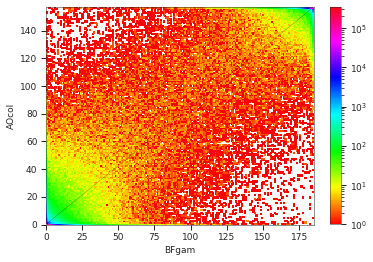

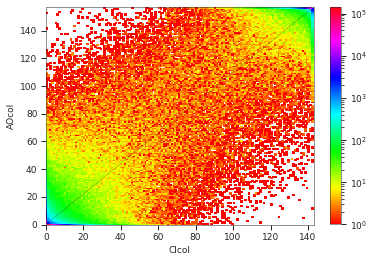

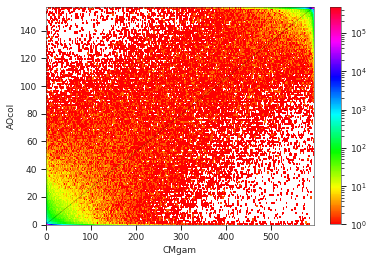

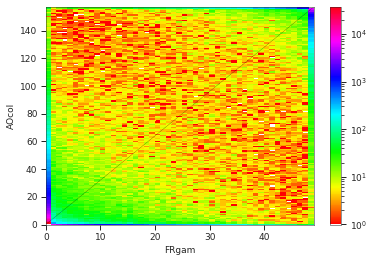

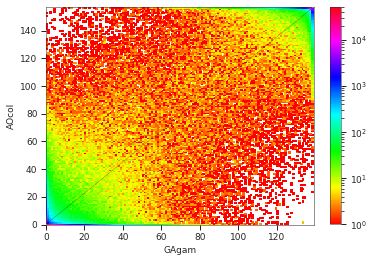

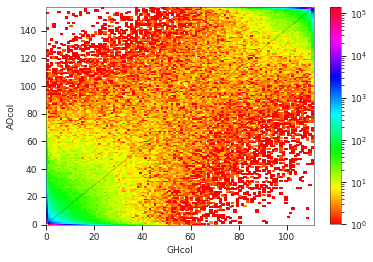

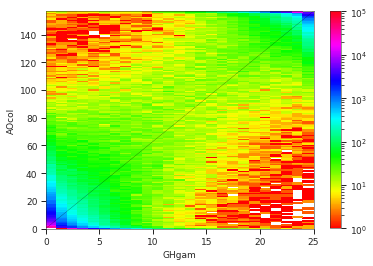

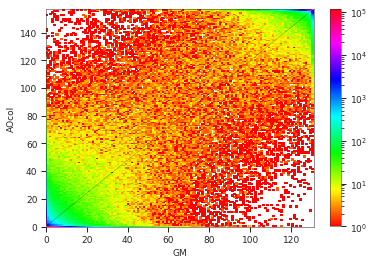

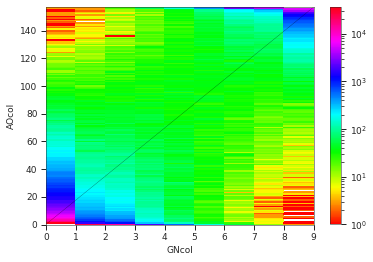

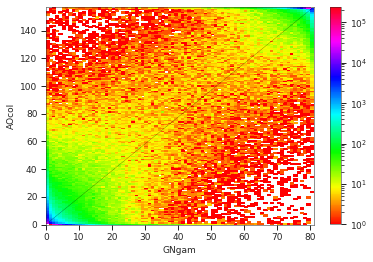

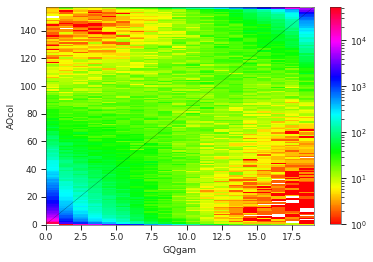

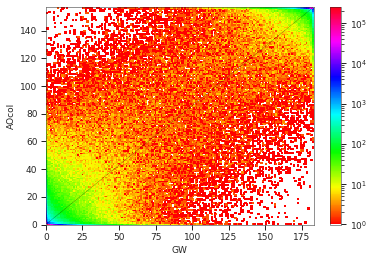

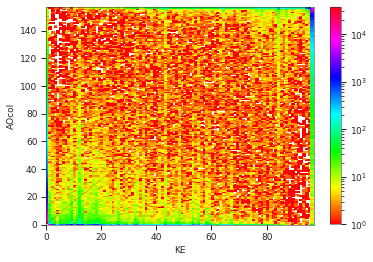

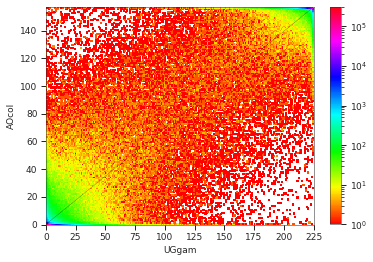

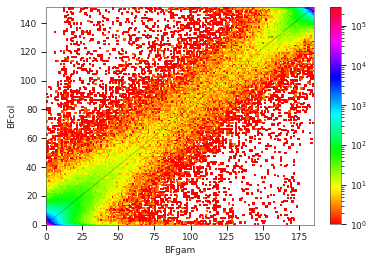

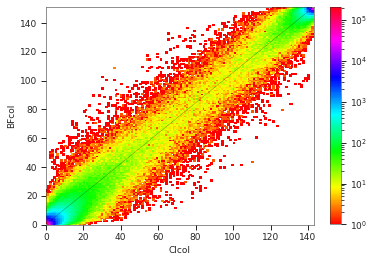

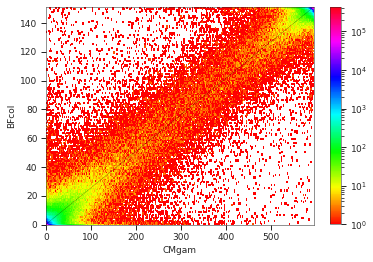

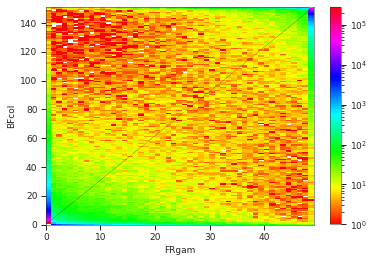

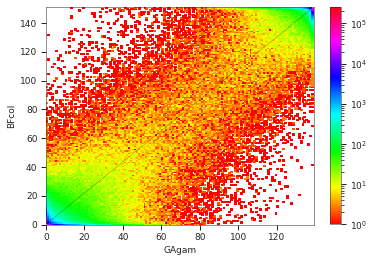

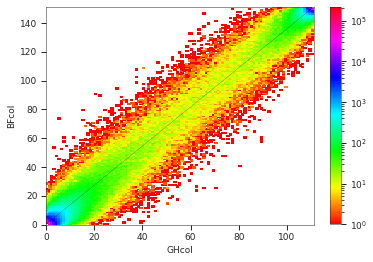

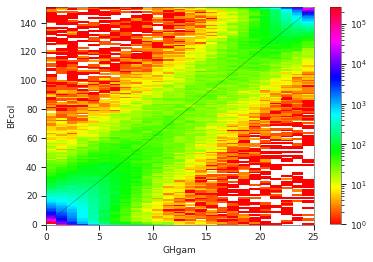

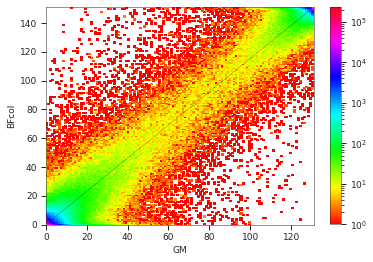

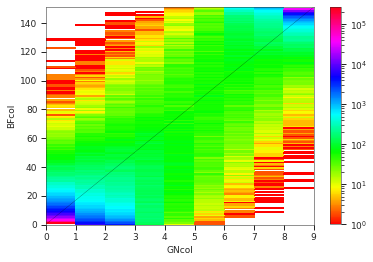

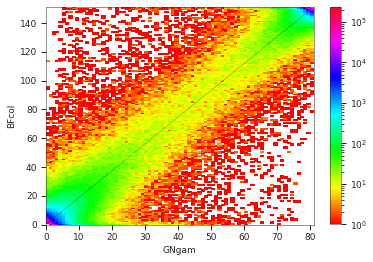

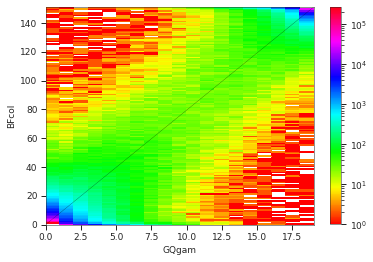

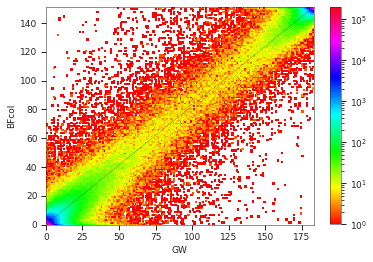

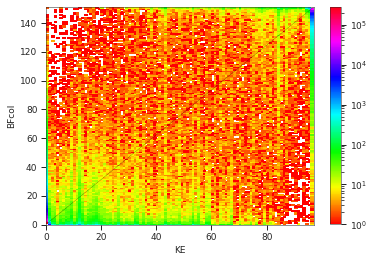

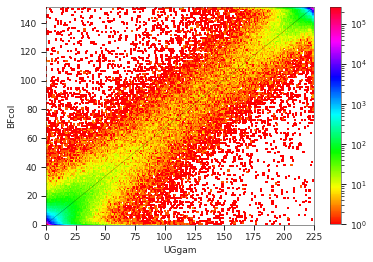

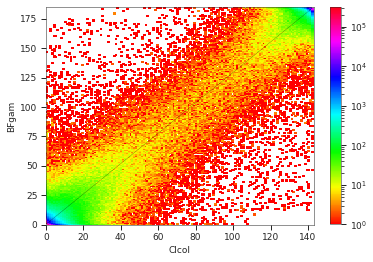

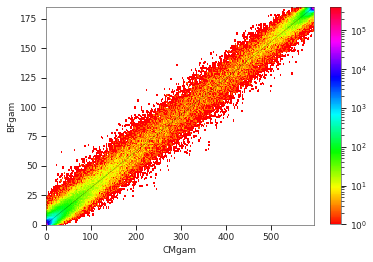

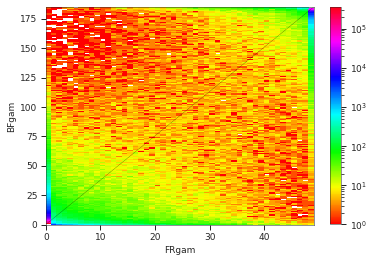

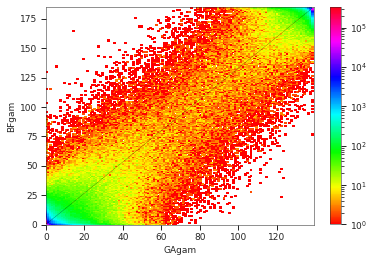

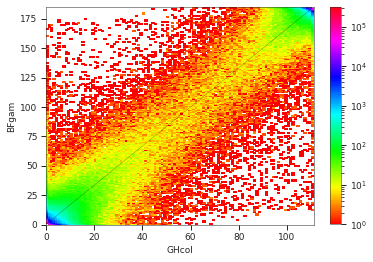

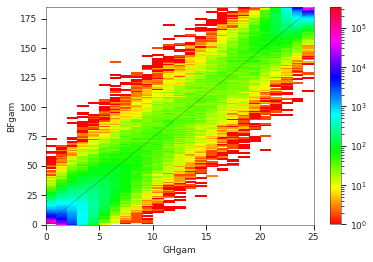

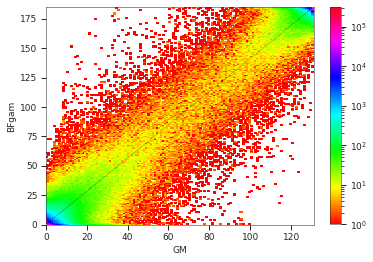

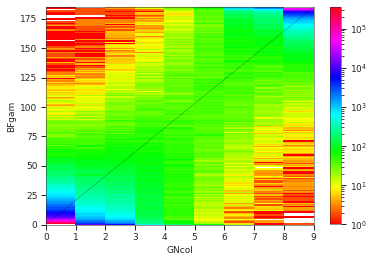

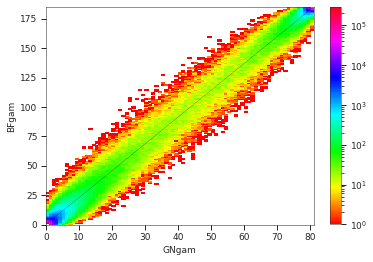

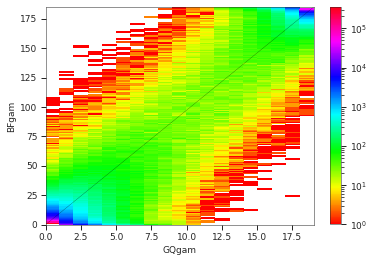

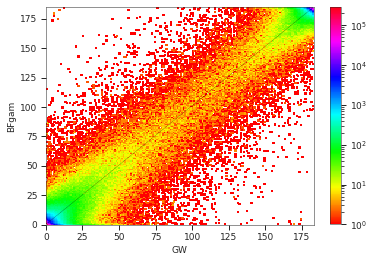

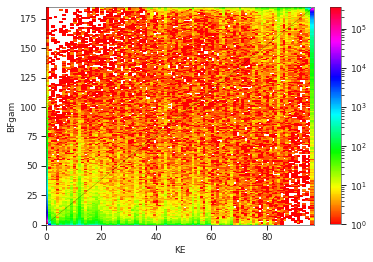

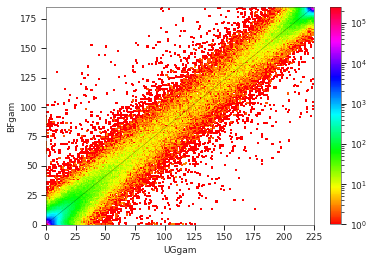

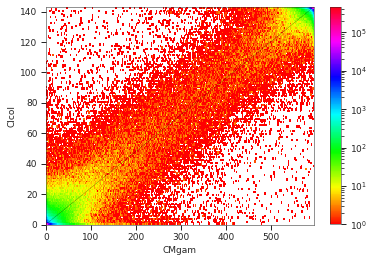

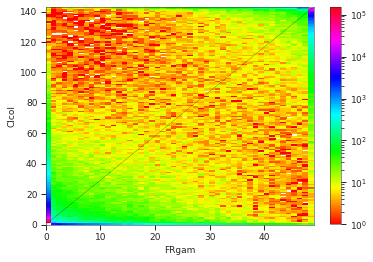

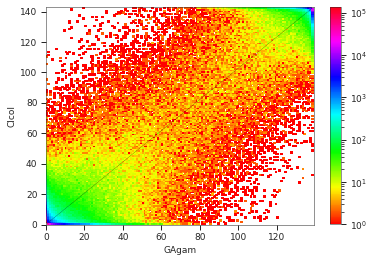

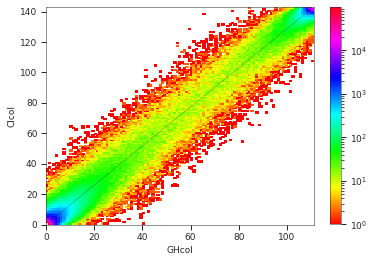

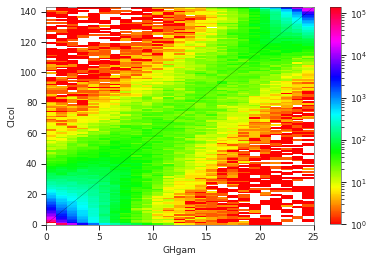

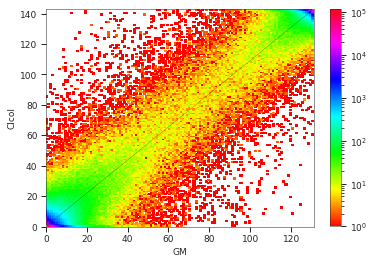

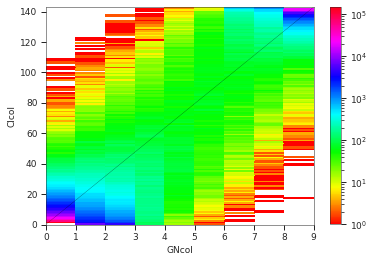

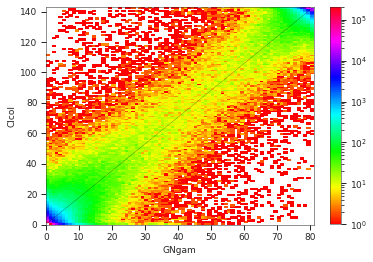

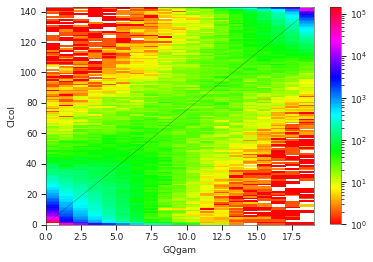

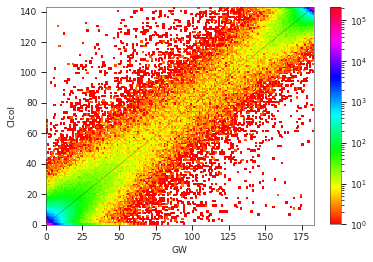

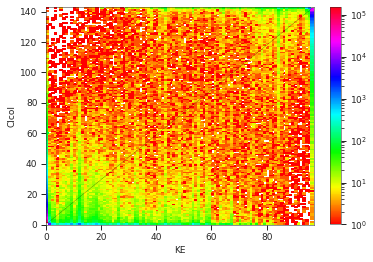

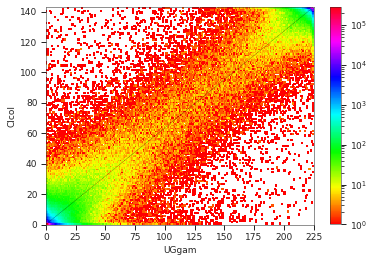

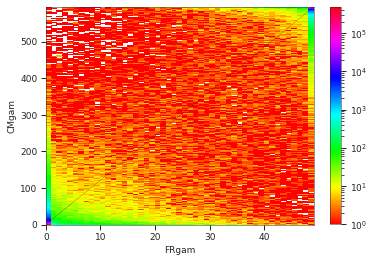

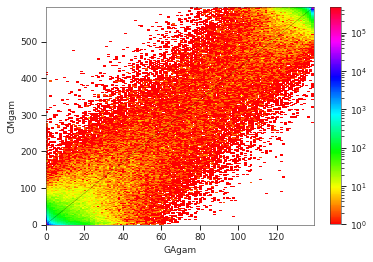

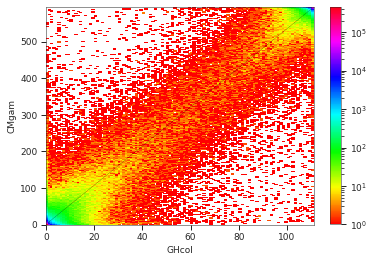

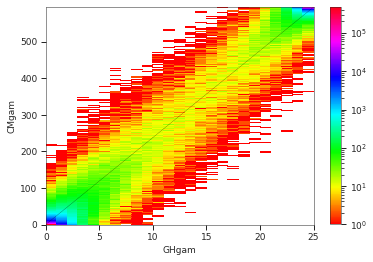

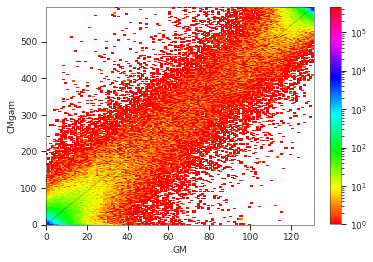

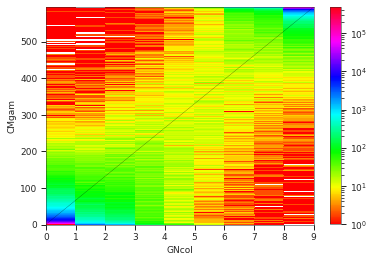

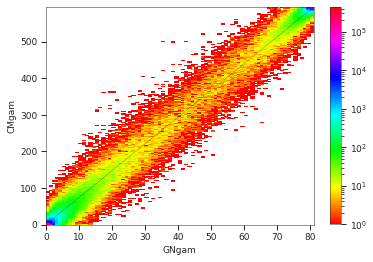

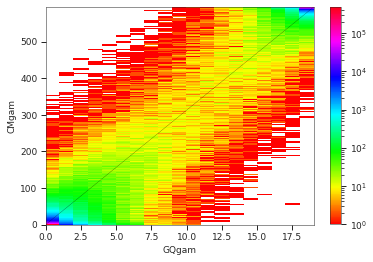

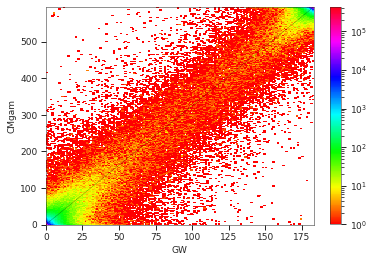

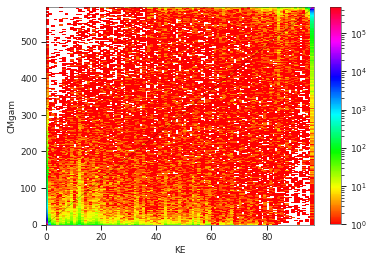

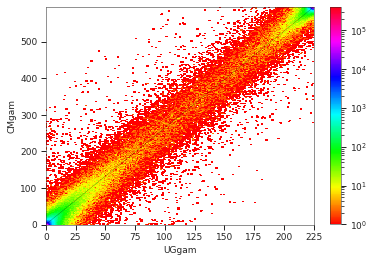

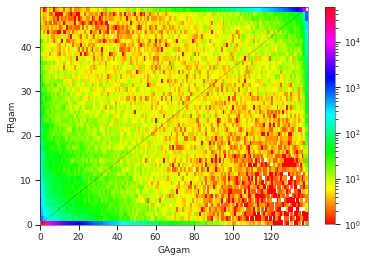

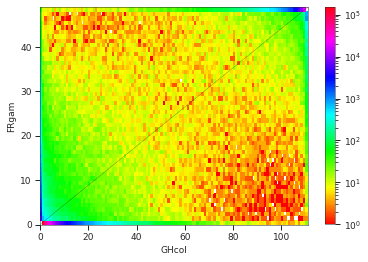

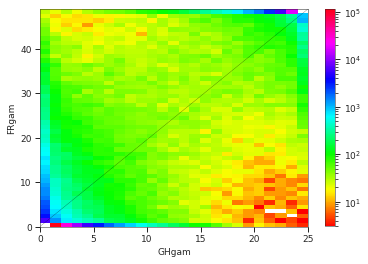

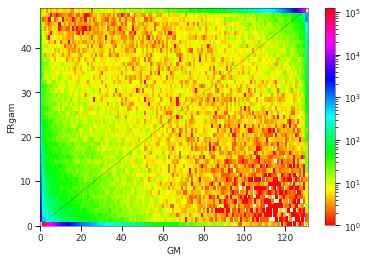

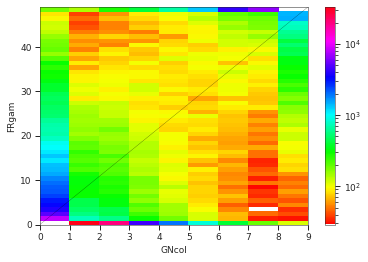

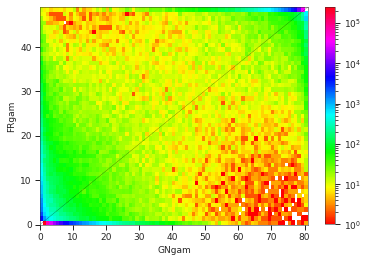

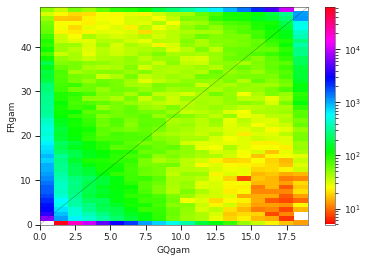

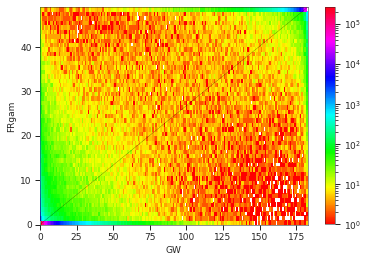

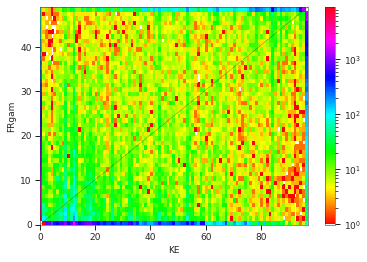

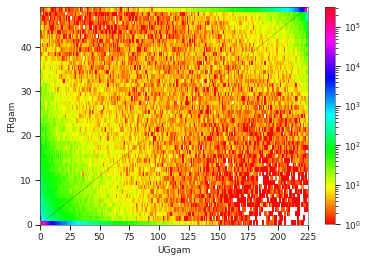

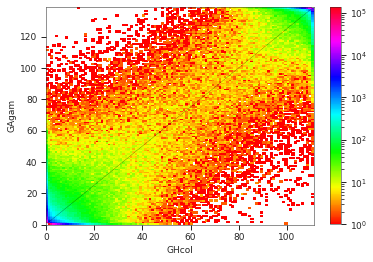

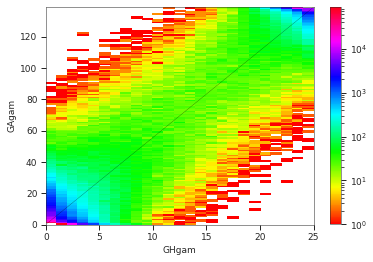

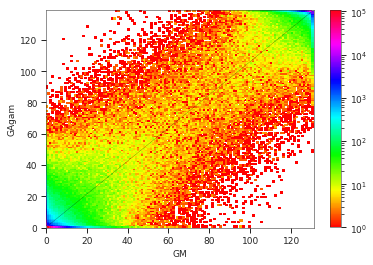

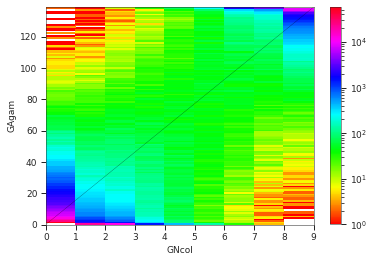

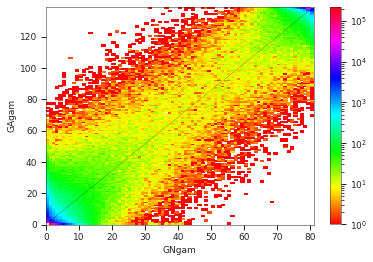

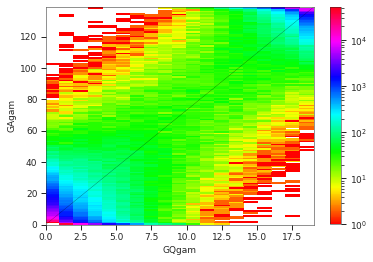

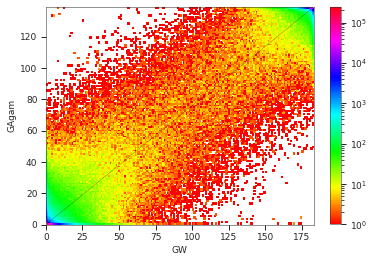

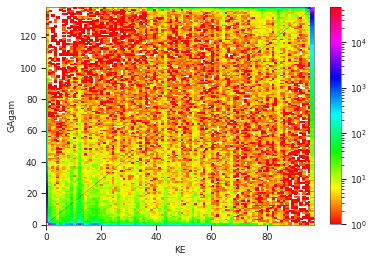

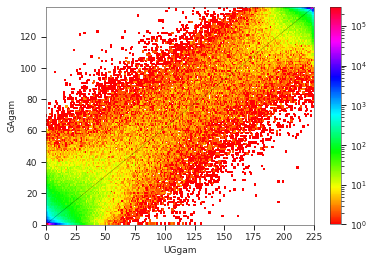

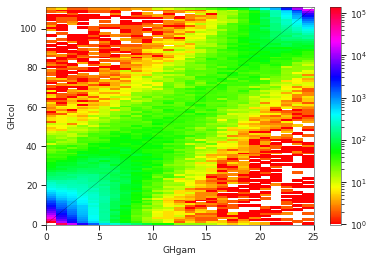

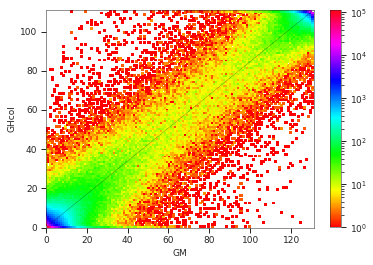

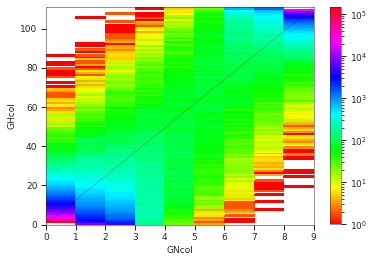

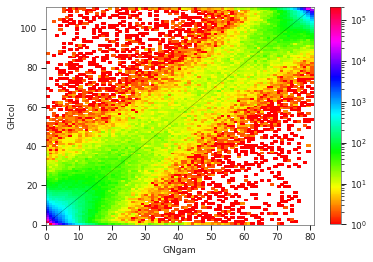

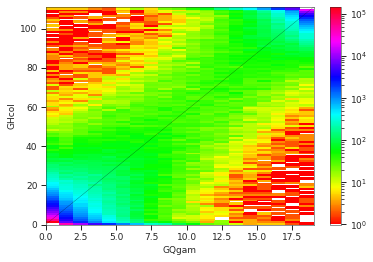

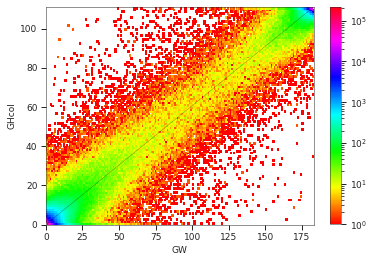

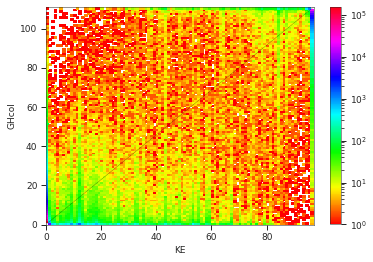

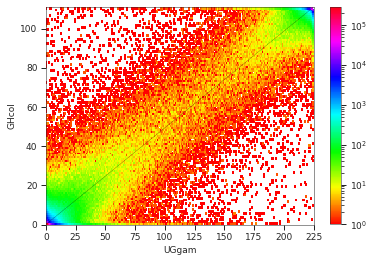

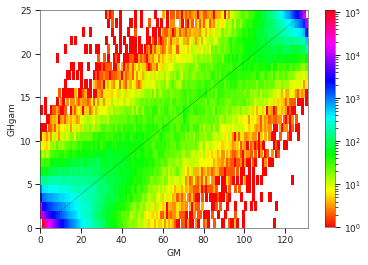

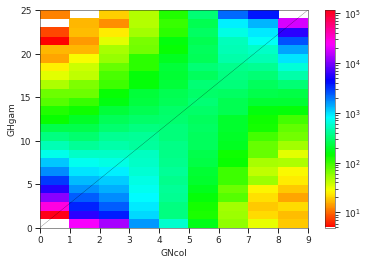

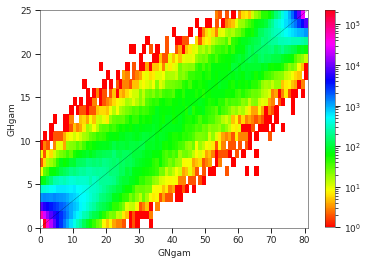

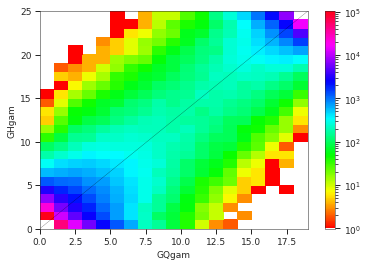

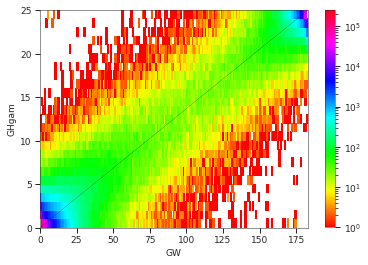

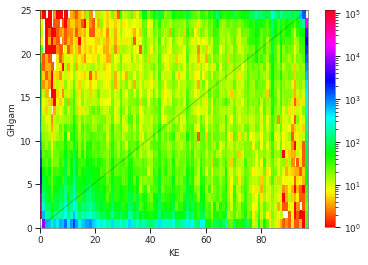

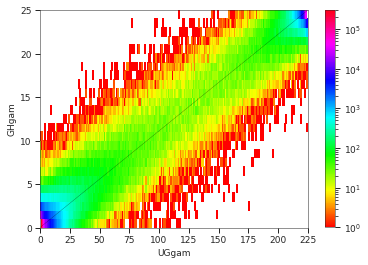

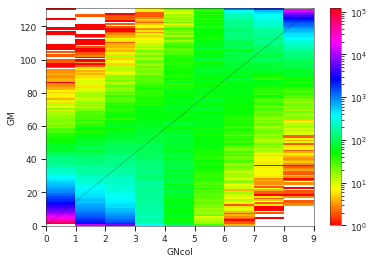

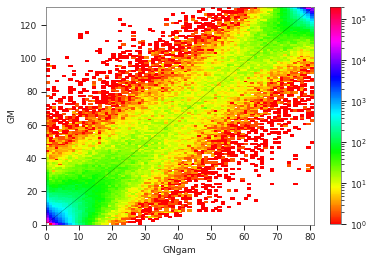

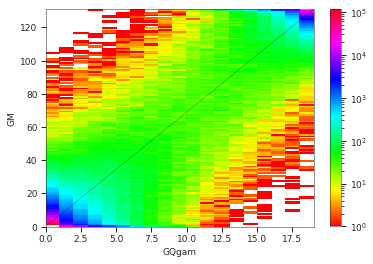

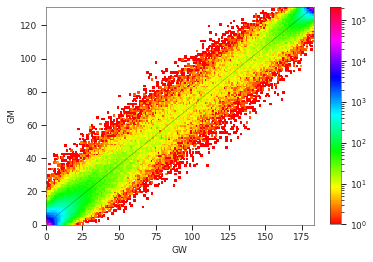

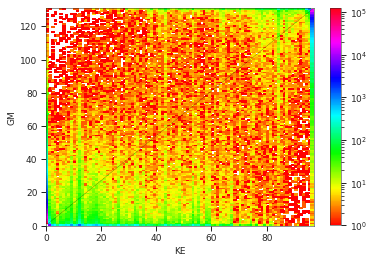

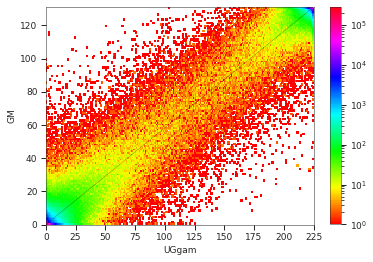

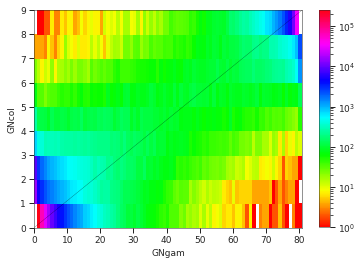

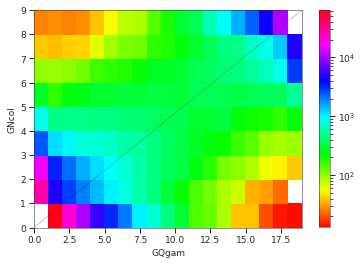

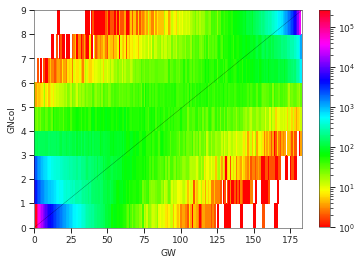

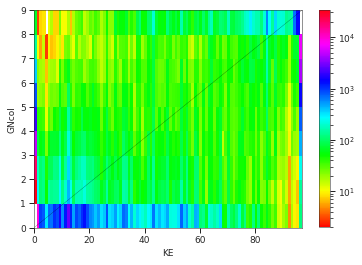

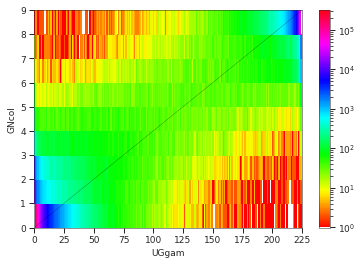

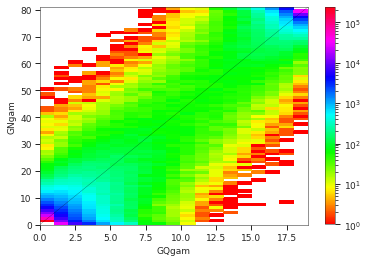

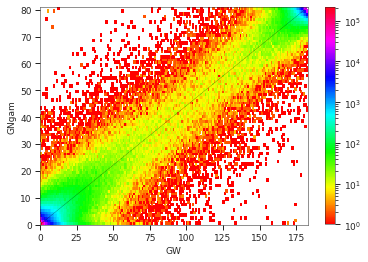

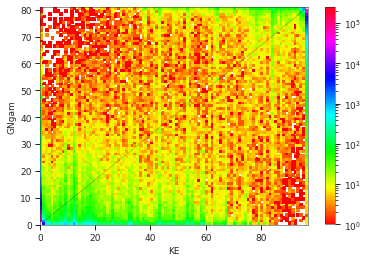

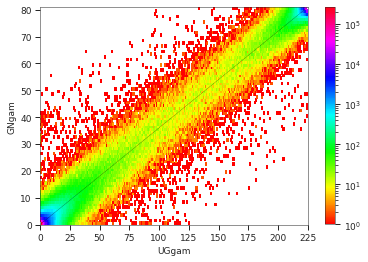

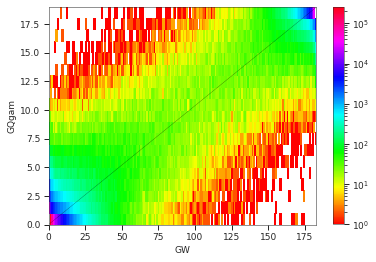

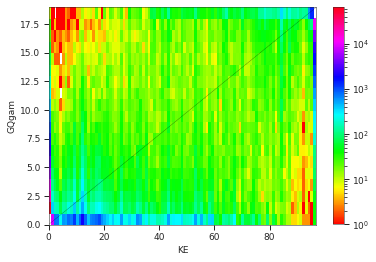

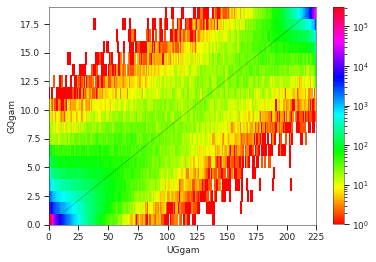

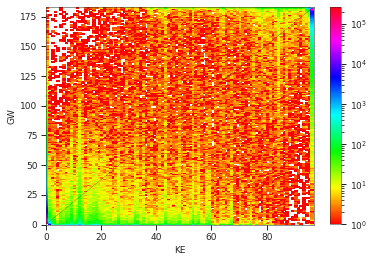

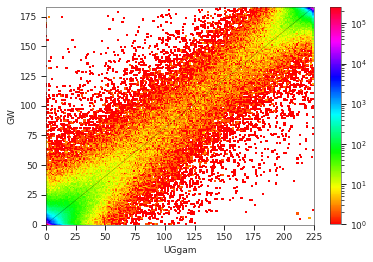

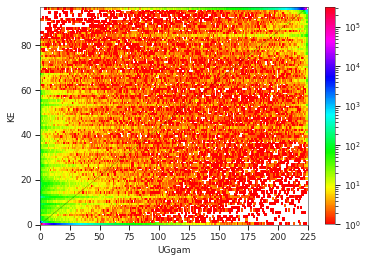

In [166]:
for i in sfs.keys():
    plot_2D_sfs(sfs[i], i)

In [171]:
for k in sfs.keys():
    print (k)
    np.save("dadi/fs_2_pops/%s_%s" % (k[0], k[1]), np.array(sfs[k]))

('AOcol', 'BFcol')
('AOcol', 'BFgam')
('AOcol', 'CIcol')
('AOcol', 'CMgam')
('AOcol', 'FRgam')
('AOcol', 'GAgam')
('AOcol', 'GHcol')
('AOcol', 'GHgam')
('AOcol', 'GM')
('AOcol', 'GNcol')
('AOcol', 'GNgam')
('AOcol', 'GQgam')
('AOcol', 'GW')
('AOcol', 'KE')
('AOcol', 'UGgam')
('BFcol', 'BFgam')
('BFcol', 'CIcol')
('BFcol', 'CMgam')
('BFcol', 'FRgam')
('BFcol', 'GAgam')
('BFcol', 'GHcol')
('BFcol', 'GHgam')
('BFcol', 'GM')
('BFcol', 'GNcol')
('BFcol', 'GNgam')
('BFcol', 'GQgam')
('BFcol', 'GW')
('BFcol', 'KE')
('BFcol', 'UGgam')
('BFgam', 'CIcol')
('BFgam', 'CMgam')
('BFgam', 'FRgam')
('BFgam', 'GAgam')
('BFgam', 'GHcol')
('BFgam', 'GHgam')
('BFgam', 'GM')
('BFgam', 'GNcol')
('BFgam', 'GNgam')
('BFgam', 'GQgam')
('BFgam', 'GW')
('BFgam', 'KE')
('BFgam', 'UGgam')
('CIcol', 'CMgam')
('CIcol', 'FRgam')
('CIcol', 'GAgam')
('CIcol', 'GHcol')
('CIcol', 'GHgam')
('CIcol', 'GM')
('CIcol', 'GNcol')
('CIcol', 'GNgam')
('CIcol', 'GQgam')
('CIcol', 'GW')
('CIcol', 'KE')
('CIcol', 'UGgam')
('CMgam', 

-------------------------------------

In [167]:
def split_mig(params, ns , pts ):
    p_misid, nu1 ,nu2 ,T ,m = params
    xx = Numerics.default_grid(pts)
    phi = PhiManip.phi_1D(xx)
    phi = PhiManip.phi_1D_to_2D(xx , phi)
    phi = Integration.two_pops(phi ,xx ,T ,nu1 ,nu2 ,m12 =m ,m21 = m)
    fs = Spectrum.from_phi(phi ,ns ,( xx , xx))
    
    return (1-p_misid)*fs + p_misid*dadi.Numerics.reverse_array(fs)



def implem(pop_name, fs, pts,
    params = [0.05, 1, 1, 1, 1],
    lower_bound = [0.001, 0.01, 0.01, 0.01, 0], 
    upper_bound = [0.1, 50, 50, 10, 10]):
    func = split_mig
    ns = fs.sample_sizes
    func_ex = dadi.Numerics.make_extrap_log_func(func)



    l = list()
    for i in range(1):
        p0 = dadi.Misc.perturb_params(params, fold=1.5, lower_bound=lower_bound, upper_bound=upper_bound)

        popt = dadi.Inference.optimize_log(p0, fs, func_ex, pts, lower_bound=lower_bound, upper_bound=upper_bound, 
                                       verbose=0, maxiter = 1, multinom=True)
        model = func_ex(popt, ns, pts)
        ll_opt = dadi.Inference.ll_multinom(model,fs)
        summary = [float(ll_opt), popt.tolist(), model]
        l.append(summary)
      
   
    array_l = np.asarray(l, dtype=object)
    # best = [ll_opt, [params]] 
    best = array_l[np.argmax(array_l[:,0], axis=0),:2]
    model = array_l[np.argmax(array_l[:,0], axis=0), -1]
    theta0 = dadi.Inference.optimal_sfs_scaling(model , fs)
    
    Na = (theta0 / 30001805) / (4. * 3.5e-9)
    generation = 0.09
    perc_misid = best[1][0]
    nu1 = best[1][1] * Na
    nu2 = best[1][2] * Na
    T = best[1][3] * (2 * Na * generation)
    m  = best[1][4]
   


    with open('dadi/output_files/equal_size_split_mig_%s_.txt' % (pop_name), 'wb') as outf:
        writer = csv.writer(outf, delimiter='\t')
        header = ['ll_opt', 'theta', 'Na', 'p_misid', 'nu1', 'nu2', 'T', 'm', 'parameters']
        writer.writerow(header)
        row = [best[0], theta0, Na, perc_misid, nu1, nu2, T, m, best[1]]

        writer.writerow(row)        
    with open('dadi/output_files/equal_size_split_all_list_%s.txt' % (pop_name), 'wb') as outf:
        writer = csv.writer(outf, delimiter='\t')
        for r in array_l:
            row = ([r])
            writer.writerow(r)
   
    fig = pylab.figure()
    dadi.Plotting.plot_2d_comp_multinom(model, fs, vmin = 1, resid_range=100)
    fig.savefig('dadi/plot/equal_size_split_%s.jpg' % pop_name, dpi=500)

def main():

    pop_name = sys.argv[1]
    fs = dadi.Spectrum(np.load("dadi/fs_2_pops/%s.npy" % pop_name), pop_ids = ['BFM', 'BFS'])
    sz = fs.sample_sizes[0] 
    pts = np.array([sz + 60, sz + 70, sz + 80])
    implem(pop_name, fs, pts)


In [173]:
fs = dadi.Spectrum(np.load("dadi/fs_2_pops/GM_GW.npy"), pop_ids = ['GM', 'GW'])
sz =  max(fs.sample_sizes[0], fs.sample_sizes[1])
pts = np.array([sz + 60, sz + 70, sz + 80])
proj = min(fs.sample_sizes[0], fs.sample_sizes[1])
fs_proj = fs.project([proj,proj])

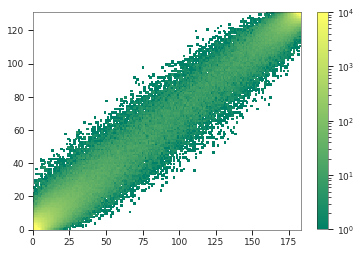

In [178]:
from matplotlib.colors import LogNorm
plt.pcolormesh(joint_sfs[('GM', 'GW')], norm=LogNorm(vmin=1, vmax=10000), cmap='summer')
plt.colorbar()

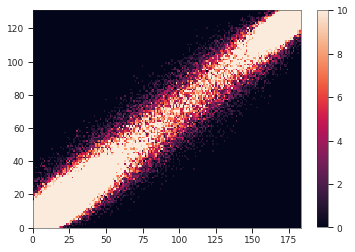

In [180]:
plt.pcolormesh(joint_sfs[('GM', 'GW')], vmin=0, vmax=10)
plt.colorbar()

---------------------

In [185]:
aa = consensus_aa('3R', ['chri'])[cond_neut]
assert ac['AOcol'][cond_neut].shape[0] == aa.shape[0]
aa

array([b'A', b'A', b'T', ..., b'.', b'.', b'.'], dtype='|S1')

In [186]:
ac_row = ac

----------------------------

In [197]:
import pyfasta

In [210]:
# lenght chrom
agam_p3_fn = 'data/Anopheles-gambiae-PEST_CHROMOSOMES_AgamP4.fa'
agam_p3 = pyfasta.Fasta(agam_p3_fn, key_fn=lambda k: k.split()[0])
sorted(agam_p3.keys())
print('3R',len(agam_p3['3R dna:chromosome chromosome:AgamP4:3R:1:53200684:1']))

3R 53200684


In [211]:
# len euchromatic regions
l_eu_3R = 37e6 - 1e6
print('l 3R eu:', l_eu_3R)

l 3R eu: 36000000.0


In [215]:
# how many variants in euchromatic regions? annot is filtered to have just eu variants (see above)
n_variants_eu_3R = annotation['3R']['variants/ANN_Annotation'].size

In [226]:
# how many variants in euchromatic regions are intergenic?
n_inter_eu_3R = (annotation['3R']['variants/ANN_Annotation'][:] == 'intergenic_region').sum()

In [228]:
# which proportion of sequence we genotyped ?
prop_geno_3R = n_inter_eu_3R / n_variants_eu_3R

In [229]:
# which actual lenght of sequence we genotyped ?
actual_lenght_3R = int(l_eu_3R * prop_geno_3R)
print('l 3R actual genotyped:', actual_lenght_3R)


l 3R actual genotyped: 16192663


In [247]:
def get_sfs(chrom, pop, cond_neut, outgroups):
    
    # call ancestral allele for intergenic variants in eucrom regions
    aa = consensus_aa(chrom, outgroups)[cond_neut & cond_inter]
    
    
    # extract variants
    variants = callset[chrom]['variants']
    ref = variants['REF'][:][cond_neut & cond_inter]
    alt = variants['ALT'][:][cond_neut & cond_inter]
    
    
    
    
    
    
    # take just the ac for for intergenic variants in eucrom regions
    ac = ac_row[pop][cond_neut & cond_inter]
   

    # locate biallelic segregating
    loc_bi_seg = (ac.allelism() == 2) & (ac[:, 0] > 0) & (ac[:, 1] > 0)
#     log(nnz(loc_bi_seg))

    # locate positions where aa is determined and matches Ag1000G
    loc_aa_match = (aa != b'.') & ((aa == ref) | (aa == alt))
#     log(nnz(loc_aa_match))

    # locate positions with missing calls
    an = ac.sum(axis=1)
    loc_nomiss = an == an.max()
#     log(nnz(loc_nomiss))

    # locations to use
    loc_asc = loc_bi_seg & loc_aa_match & loc_nomiss
#     log(nnz(loc_asc), chrom, *outgroups)
    ac = ac[loc_asc]
    aa = aa[loc_asc]
    ref = ref[loc_asc]
    alt = alt[loc_asc]

    # polarise
    dac = np.zeros(ac.shape[0], dtype='u4')
    dac[aa == ref] = ac[:, 1][aa == ref]
    dac[aa == alt] = ac[:, 0][aa == alt]

    # compute SFS
    sfs_raw = np.bincount(dac)
    
    sfs = sfs_raw[1:]
    

    
    return sfs

In [248]:
sfs = {}
for pop in pops:
    sfs_list = get_sfs('3R', pop, cond_neut, ['chri'])
    sfs[pop] = sfs_list

In [249]:
! mkdir -p dadi/stairway/input_files

In [250]:
import csv
pops

['AOcol',
 'BFcol',
 'BFgam',
 'CIcol',
 'CMgam',
 'FRgam',
 'GAgam',
 'GHcol',
 'GHgam',
 'GM',
 'GNcol',
 'GNgam',
 'GQgam',
 'GW',
 'KE',
 'UGgam']

In [251]:
for pop in pops:
    with open('dadi/stairway/input_files/input_stairway_%s.tab' % pop ,'w', newline='') as csvfile:
        writer = csv.writer(csvfile, delimiter='\t')
        writer.writerow([pop, len(sfs[pop]) + 1, t_lenght, '1', len(sfs[pop])])
        writer.writerow([i for i in sfs[pop]])


In [439]:
for pop in pops:
    with open('dadi/sf_single/%s.tab' % pop ,'w', newline='') as csvfile:
        writer = csv.writer(csvfile, delimiter=' ')
        writer.writerow([len(sfs[pop]) - 1])
        writer.writerow([i for i in sfs[pop]])


In [3]:
import dadi

-------------------------------------

In [4]:
from dadi import Numerics
from dadi import PhiManip
from dadi import Integration
from dadi import Spectrum
import dadi

ImportError: cannot import name 'Numerics'

In [109]:
def two_epoch(params, ns, pts):
    nu1, T1, p_misid = params

    xx = Numerics.default_grid(pts)
    phi = PhiManip.phi_1D(xx)

    phi = Integration.one_pop(phi, xx, T1, nu1)

    fs = Spectrum.from_phi(phi, ns, (xx,))
    return (1 - p_misid) * fs + p_misid * dadi.Numerics.reverse_array(fs)


def three_epoch(params, ns, pts):
    nu1, nu2, T1, T2, p_misid = [1, 1, 1, 1, 0.01]

    xx = Numerics.default_grid(pts)
    phi = PhiManip.phi_1D(xx)

    phi = Integration.one_pop(phi, xx, T1, nu1)
    phi = Integration.one_pop(phi, xx, T2, nu2)

    fs = Spectrum.from_phi(phi, ns, (xx,))
    return (1 - p_misid) * fs + p_misid * dadi.Numerics.reverse_array(fs)

def four_epoch(params, ns, pts):
    nu1, nu2, nu3, T1, T2, T3, p_misid = params

    xx = Numerics.default_grid(pts)
    phi = PhiManip.phi_1D(xx)

    phi = Integration.one_pop(phi, xx, T1, nu1)
    phi = Integration.one_pop(phi, xx, T2, nu2)
    phi = Integration.one_pop(phi, xx, T3, nu3)

    fs = Spectrum.from_phi(phi, ns, (xx,))
    return (1 - p_misid) * fs + p_misid * dadi.Numerics.reverse_array(fs)

def three_exp(params, ns, pts):
    nu1, nu2, T1, T2, p_misid = params

    xx = Numerics.default_grid(pts)
    phi = PhiManip.phi_1D(xx)

    phi = Integration.one_pop(phi, xx, T1, nu1)
    nu_func = lambda t: numpy.exp(numpy.log(nu2) * t/T )
    phi = Integration.one_pop(phi, xx, T2, nu_func)

    fs = Spectrum.from_phi(phi, ns, (xx,))
    return (1 - p_misid) * fs + p_misid * dadi.Numerics.reverse_array(fs)
simul = {'two_epoch': two_epoch, 'three_epoch': three_epoch, 'three_exp': three_exp, 'four_epoch': four_epoch}

def implem(pop_name, k, fs, pts):


    if k == "two_epoch":
        params=[1, 1, 0.01]
        lower_bound=[0.1, 0.01, 0.001]
        upper_bound=[100, 10, 0.1]

    elif k == "three_epoch" or k == "three_exp":
        params=[1, 1, 1, 1, 0.01]
        lower_bound=[0.1, 0.1, 0.01, 0.01, 0.001]
        upper_bound=[100, 100, 10, 10, 0.1]

    elif k == "four_epoch":
        params=array[1, 1, 1, 1, 1, 1, 0.01]
        lower_bound=[0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0.001]
        upper_bound=[100, 100, 100, 10, 10, 10, 0.1]


    func = simul[k]
    ns = fs.sample_sizes
    func_ex = dadi.Numerics.make_extrap_log_func(func)

    l = list()
    for i in range(50):
        p0 = dadi.Misc.perturb_params(params, fold=1.5, lower_bound=lower_bound, upper_bound=upper_bound)

        popt = dadi.Inference.optimize_log(p0, fs, func_ex, pts, lower_bound=lower_bound, upper_bound=upper_bound,
                                           verbose=0, maxiter=300, multinom=True)
        model = func_ex(popt, ns, pts)
        ll_opt = dadi.Inference.ll_multinom(model, fs)
        summary = [float(ll_opt), np.array(popt).tolist(), model]
        l.append(summary)
        print (popt)

    array_l = np.asarray(l, dtype=object)
    #best = [ll_opt, [params]]
    best = array_l[np.argmax(array_l[:, 0], axis=0), :2]
    model = array_l[np.argmax(array_l[:, 0], axis=0), -1]
    theta0 = dadi.Inference.optimal_sfs_scaling(model, fs)
    print ('QUESTO È THETA0 STRONZO:', theta0)
    Na = (theta0 / 30001805) / (4. * 3.5e-9)
    generation = 0.09


    with open('dadi/output_files/%s_%s.txt' % (k,pop_name),
              'wb') as outf:
        writer = csv.writer(outf, delimiter='\t')

        if k == "two_epoch":

            N1 = best[1][0] * Na
            T1 = best[1][1] * (2 * Na * generation)

            header = ['ll_opt', 'theta', 'Na', 'N1', 'T1', 'parameters']
            writer.writerow(header)
            row = [best[0], theta0, Na, N1, T1, best[1]]
            writer.writerow(row)

        elif k == "three_epoch" or k == "three_exp":

            N1 = best[1][0] * Na
            N2 = best[1][1] * Na
            
            T1 = best[1][1] * (2 * Na * generation)
            header = ['ll_opt', 'theta', 'Na', 'N1', 'N2', 'T1(lenght)', 'T2', 'parameters']
            writer.writerow(header)
            row = [best[0], theta0, Na, N1, N2, T1, T2, best[1]]
            writer.writerow(row)

        elif k == "four_epoch":

            N1 = best[1][0] * Na
            N2 = best[1][1] * Na
            N3 = best[1][2] * Na
            T1 = best[1][3] * (2 * Na * generation)
            T2 = best[1][4] * (2 * Na * generation)
            T3 = best[1][5] * (2 * Na * generation)

            header = ['ll_opt', 'theta', 'Na', 'N1', 'N2', 'N3' 'T1(lenght)', 'T2(lenght)', 'T3', 'parameters']
            writer.writerow(header)
            row = [best[0], theta0, Na, N1, N2, T1, T2, best[1]]
            writer.writerow(row)


    fig = pylab.figure()
    dadi.Plotting.plot_1d_comp_multinom(model, fs)
    fig.savefig('dadi/plot/%s_%s.txt' % (k, pop_name))

In [110]:
df = etl.fromcsv("dadi/sf_single/BFcol.tab", delimiter=" ")
fs = [int(float(i)) for i in df[1]]

In [111]:
fs = dadi.Spectrum(fs)
sz = fs.sample_sizes[0]
pts = np.array([sz + 30, sz + 40, sz + 50])
sz, pts

(148, array([178, 188, 198]))

In [112]:
l = implem('BFcol', "three_epoch", fs, pts)

(array([1.62323643, 0.42782799, 1.434962  , 2.13339092, 0.02748616]), 85560.93297449677)
(array([2.39802471, 0.49710806, 2.49236744, 0.66922533, 0.00686949]), 85560.93297449677)
(array([0.40474807, 2.7256894 , 2.61457301, 0.51684695, 0.01964495]), 85560.93297449677)
(array([1.28795559, 0.87181528, 2.10129304, 0.51652027, 0.00986914]), 85560.93297449677)
(array([0.64708116, 1.37530832, 1.38492199, 0.53366496, 0.01025651]), 85560.93297449677)
(array([0.53515906, 1.05297738, 0.57534655, 1.05050562, 0.00718275]), 85560.93297449677)
(array([0.41373559, 0.40599515, 1.56030074, 2.44578175, 0.00965527]), 85560.93297449677)
(array([1.49120757, 0.52324871, 1.21573943, 0.84835823, 0.02343362]), 85560.93297449677)
(array([2.70490109, 0.37263348, 0.61026415, 1.0324658 , 0.00429413]), 85560.93297449677)
(array([1.14033372, 2.82787627, 1.82305084, 0.51766363, 0.00593678]), 85560.93297449677)
(array([1.13031469, 1.3121118 , 0.67370521, 1.1736646 , 0.02091828]), 85560.93297449677)
(array([2.65442509, 1

TypeError: a bytes-like object is required, not 'str'

#### RISOLVERE PROBLEMA DI BEST MOLTO PROBABILEMNTE NELL'ARRAY np.array(popt).tolist() RIPROVARE VECCHIO SCRIPT ARRAY FALLATI

----------------------------
# Sandbox

In [50]:

def two_epoch(params, ns, pts):
    nu1, T1, p_misid = [1, 1, 0.01]
    xx = Numerics.default_grid(pts)
    phi = PhiManip.phi_1D(xx)

    phi = Integration.one_pop(phi, xx, T1, nu1)

    fs = Spectrum.from_phi(phi, ns, (xx,))
    return (1 - p_misid) * fs + p_misid * dadi.Numerics.reverse_array(fs)

def implem(pop_name, k, fs, pts):
    if k == "two_epoch":
        params=1, 1, 0.01
        lower_bound=[0.1, 0.01, 0.001]
        upper_bound=[100, 10, 0.1]

    elif k == "three_epoch" or k == "three_exp":
        params=np.array([1, 1, 1, 1, 0.01])
        lower_bound=[0.1, 0.1, 0.01, 0.01, 0.001]
        upper_bound=[100, 100, 10, 10, 0.1]

    elif k == "four_epoch":
        params=np.array([1, 1, 1, 1, 1, 1, 0.01])
        lower_bound=[0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0.001]
        upper_bound=[100, 100, 100, 10, 10, 10, 0.1]

    simul = {'two_epoch': two_epoch}
    func = simul[k]
    ns = fs.sample_sizes
    func_ex = dadi.Numerics.make_extrap_log_func(func)

    l = list()
    for i in range(5):
        p0 = dadi.Misc.perturb_params(params, fold=1.5, lower_bound=lower_bound, upper_bound=upper_bound)

        popt = dadi.Inference.optimize_log(p0, fs, func_ex, pts, lower_bound=lower_bound, upper_bound=upper_bound,
                                           verbose=len(params), maxiter=300, multinom=True)
        model = func_ex(popt, ns, pts)
        ll_opt = dadi.Inference.ll_multinom(model, fs)
        
        summary = [float(ll_opt), np.array(popt).tolist(), model]
        l.append(summary)
        print (popt)
    return l